In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vrmaverick/RentalBike/main/datasets/BikeData.csv")
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed(m/s),Visibility_(10m),Dew_point_temperature,Rainfall(mm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,Autumn,No Holiday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,Autumn,No Holiday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,Autumn,No Holiday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,Autumn,No Holiday


In [ ]:
# we need to convert data of numerical types object to int
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed(m/s),Visibility_(10m),Dew_point_temperature,Rainfall(mm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.148687
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,1.128193
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,35.000000


In [ ]:
df.isna().sum() # No null values

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed(m/s)          0
Visibility_(10m)         0
Dew_point_temperature    0
Rainfall(mm)             0
Seasons                  0
Holiday                  0
dtype: int64

In [ ]:
df.info() # per column info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed(m/s)        8760 non-null   float64
 5   Visibility_(10m)       8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Rainfall(mm)           8760 non-null   float64
 8   Seasons                8760 non-null   object 
 9   Holiday                8760 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 684.5+ KB


In [ ]:
df.info(verbose =False) #overall info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Columns: 10 entries, Rented_Bike_Count to Holiday
dtypes: float64(4), int64(4), object(2)
memory usage: 684.5+ KB


In [ ]:
# Now converting the label object using dummies
df_one_hot = pd.get_dummies(df,dtype=int) # Else it will give bool by defualt
df_one_hot.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed(m/s),Visibility_(10m),Dew_point_temperature,Rainfall(mm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,1


In [ ]:
X = df_one_hot.drop('Rented_Bike_Count',axis = 1)
y = df_one_hot['Rented_Bike_Count']

In [ ]:
X.head()

,Hour,Temperature,Humidity,Wind_speed(m/s),Visibility_(10m),Dew_point_temperature,Rainfall(mm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0,0,0,1,0,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0,0,0,1,0,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0,0,0,1,0,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0,0,0,1,0,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0,0,0,1,0,1


In [ ]:
y.head()

0    254
1    204
2    173
3    107
4     78
Name: Rented_Bike_Count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=52)

In [ ]:
np.array(X_train)

array([[19. , 13.3, 37. , ...,  0. ,  0. ,  1. ],
       [17. ,  3.8, 90. , ...,  1. ,  0. ,  1. ],
       [ 9. , -6.7, 62. , ...,  1. ,  0. ,  1. ],
       ...,
       [23. , 20.7, 63. , ...,  0. ,  0. ,  1. ],
       [13. , 17.7, 25. , ...,  0. ,  0. ,  1. ],
       [ 5. , 11.5, 70. , ...,  0. ,  1. ,  0. ]])

In [ ]:
import tensorflow as t
# Crating a model
# Names are optional and are used for better visualization of structure below
mod2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'NonLinear')
mod2.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=300),
              metrics = ['mae'])
mod2.fit(X_train,y_train,epochs=1000)

In [ ]:
mod2.save("/content/drive/MyDrive/datasets/sales.h5") # mae on training dataset is roughly between 100 to 125

In [ ]:
# mod2 = tf.keras.models.load_model("/content/drive/MyDrive/datasets/sales.h5")

In [ ]:
mod2.evaluate(X_test,y_test) # Seeing results on testing dataset which clearly indicates overfitting

83/83 [==============================] - 0s 2ms/step - loss: 206.3929 - mae: 206.3929


[206.39291381835938, 206.39291381835938]

In [ ]:
print(y_train.median(),y_train.mean())

500.0 700.3152315720808


# Our model is not perfoerming too well as the evaluation results are roughly upto 200 but actually it is be 700(mean) on an average

We will experiment on 2 more models  :

mod1 : decresing complexity by reducing layers and applying ```kernel_regularizer='l2'``` and learning rate 10

mod2 : (Baseline already trained just assigned a wrong variable)

mod3 : Even furthur reduction in layers and using SCD as optimizer

In [ ]:
mod1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer='l2'),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer='l2'),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'NonLinear')
mod1.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=10),
              metrics = ['mae'])
history = mod1.fit(X_train,y_train,epochs=900,verbose=0)
mod1.save("/content/drive/MyDrive/datasets/sales1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mod1.evaluate(X_test,y_test) # Seeing results on testing dataset which clearly indicates overfitting

83/83 [==============================] - 0s 2ms/step - loss: 192.1531 - mae: 189.4114


[192.15310668945312, 189.41139221191406]

In [ ]:
mod3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer='l2'),
],name = 'NonLinear')
mod3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              # optimizer = tf.keras.optimizers.Adam(lr=10),
              metrics = ['mae'])
mod3.fit(X_train,y_train,epochs=900,verbose=0)
mod3.save("/content/drive/MyDrive/datasets/sales1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
mod3.evaluate(X_test,y_test)

83/83 [==============================] - 0s 2ms/step - loss: 699.8864 - mae: 699.8864


[699.8863525390625, 699.8863525390625]

# Model 1 performend better

Text(0.5, 0, 'epoches')

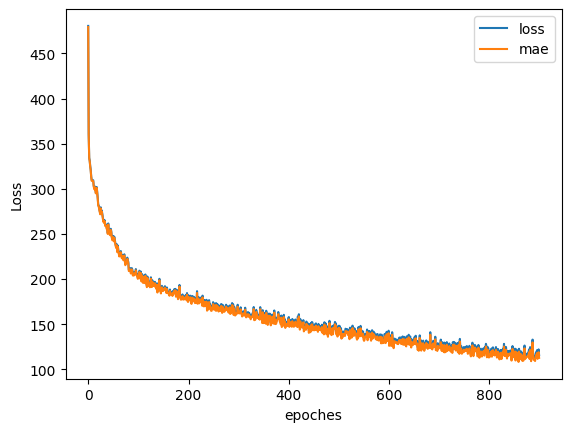

In [ ]:
# Model 1 performend better
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epoches")

# We used the history variable to store the callbacks and plot them to visualizie like seen below


# We can also Normalize the data for further improvement in the models ability to learn

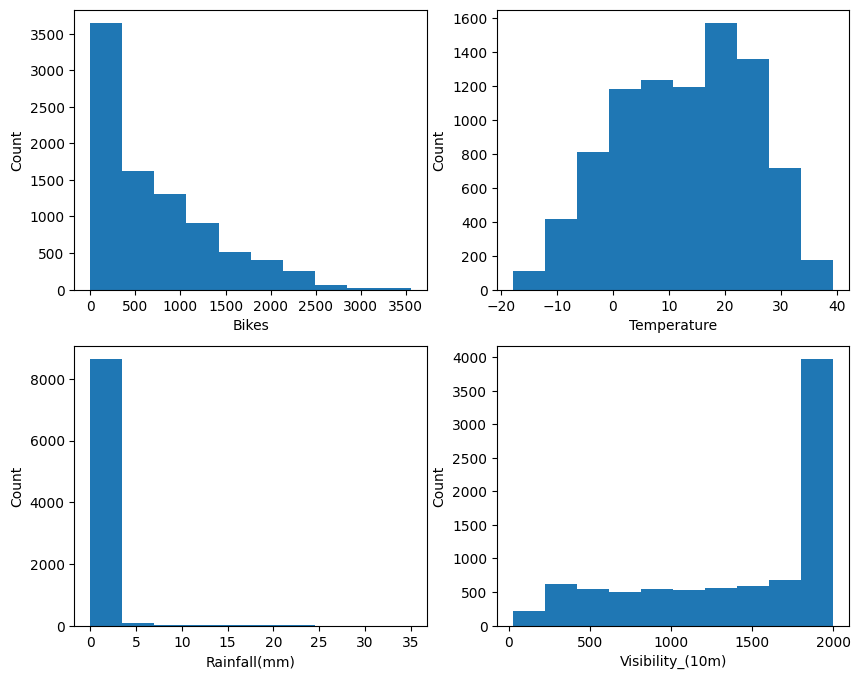

In [ ]:
fig,ax = plt.subplots(2, 2, figsize=(10,8))
ax[0][0].hist(df_one_hot['Rented_Bike_Count']);
ax[0][0].set_xlabel("Bikes")
ax[0][0].set_ylabel("Count")
ax[0][1].hist(df_one_hot['Temperature']);
ax[0][1].set_xlabel("Temperature")
ax[0][1].set_ylabel("Count")
ax[1][0].hist(df_one_hot['Rainfall(mm)']);
ax[1][0].set_xlabel("Rainfall(mm)")
ax[1][0].set_ylabel("Count")
ax[1][1].hist(df_one_hot['Visibility_(10m)']);
ax[1][1].set_xlabel("Visibility_(10m)")
ax[1][1].set_ylabel("Count");


# Now lets normalize and preprocess data

In [ ]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed(m/s),Visibility_(10m),Dew_point_temperature,Rainfall(mm),Seasons,Holiday
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,Winter,No Holiday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,Winter,No Holiday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,Winter,No Holiday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,Winter,No Holiday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,Autumn,No Holiday
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,Autumn,No Holiday
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,Autumn,No Holiday
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,Autumn,No Holiday


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
(MinMaxScaler(),['Hour','Temperature','Humidity','Wind_speed(m/s)','Visibility_(10m)','Dew_point_temperature','Rainfall(mm)']), # all numeric columns
(OneHotEncoder(handle_unknown='ignore'),['Seasons','Holiday']) # handle unkwon handles the other columns that onehot endcoder doest know must be ignored
)

X = df.drop('Rented_Bike_Count',axis = 1)
y = df['Rented_Bike_Count']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=98)

In [ ]:
# Fitting our transformer first with training data and not the unseen testing data

ct.fit(X_train);

In [ ]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test) # returns an array so we can use array methods to access

In [ ]:
X_train.loc[0] # Dataframe so we need to use loc

Hour                              0
Temperature                    -5.2
Humidity                         37
Wind_speed(m/s)                 2.2
Visibility_(10m)               2000
Dew_point_temperature         -17.6
Rainfall(mm)                    0.0
Seasons                      Winter
Holiday                  No Holiday
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.47826087, 0.85764499, 0.71428571, 0.1369863 , 0.60701576,
       0.96366782, 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        ])

In [ ]:
print(f"Before normalization and encoding shape was : {X_train.shape}\nNow we have the shape : {X_train_normal.shape}")

Before normalization and encoding shape was : (6132, 9)
Now we have the shape : (6132, 13)


We can see that the data has normalized

In [ ]:
# Training the same best perfroming model among three using the normalized data
normalized_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer='l2'),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer='l2'),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'NonLinear')
normalized_model.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=10),
              metrics = ['mae'])
history = normalized_model.fit(X_train_normal,y_train,epochs=900,verbose=0)
normalized_model.save("/content/drive/MyDrive/datasets/normalized_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 0, 'epoches')

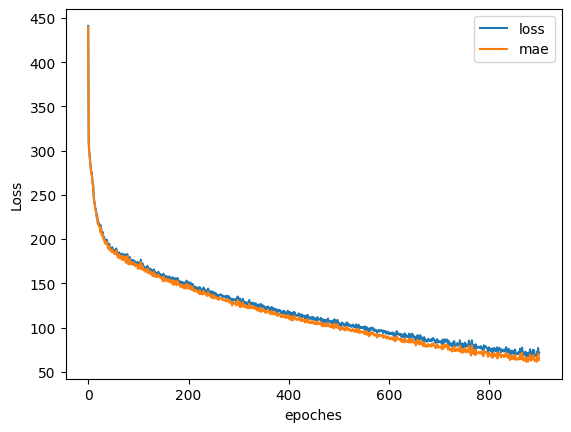

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epoches")

In [ ]:
normalized_model.evaluate(X_test_normal,y_test)

83/83 [==============================] - 0s 2ms/step - loss: 179.0094 - mae: 172.9615


[179.00938415527344, 172.9615020751953]

# Unnormalized model results
83/83 [==============================] - 0s 2ms/step - loss: 192.1531 - mae: 189.4114
[192.15310668945312, 189.41139221191406]

Now testing l1 regularization insead of l2

In [ ]:
# Training the same best perfroming model among three using the normalized data
normalized_model_l1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu",name='input_layer'), # softmax does not work here
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer='l1'),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(200,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu",kernel_regularizer='l1'),
    tf.keras.layers.Dense(1,name='output_layer')
],name = 'NonLinear')
normalized_model_l1.compile(loss = tf.keras.losses.mae,
              # optimizer = tf.keras.optimizers.SGD(),
              optimizer = tf.keras.optimizers.Adam(lr=10),
              metrics = ['mae'])
history = normalized_model_l1.fit(X_train_normal,y_train,epochs=900,verbose=0)
normalized_model_l1.save("/content/drive/MyDrive/datasets/normalized_model_l1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Text(0.5, 0, 'epoches')

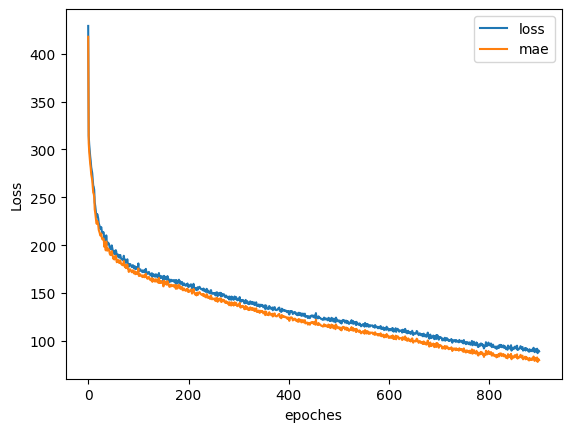

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epoches")

In [ ]:
normalized_model_l1.evaluate(X_test_normal,y_test)

83/83 [==============================] - 0s 2ms/step - loss: 188.3991 - mae: 179.2528


[188.39910888671875, 179.25283813476562]